In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%run Untitled.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27390 entries, 0 to 27389
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         27390 non-null  object 
 1   Week         27390 non-null  int64  
 2   ProdName     27390 non-null  object 
 3   Price        27390 non-null  float64
 4   Seasonality  27390 non-null  int64  
 5   Quantity     27390 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ MB


In [3]:
results_df

,ProdName,Val_Score,Train_Score,Model,ModelType,Std_Dev
0,Basil Extra Virgin Olive Oil,1.542348,1.581817,LinearRegression(),0.0,1.924145
1,Extra Virgin Olive Oil - Bold,1.618561,1.631513,LinearRegression(),0.0,2.015710
2,Extra Virgin Olive Oil - Delicate,1.624225,1.604912,LinearRegression(),0.0,2.033735
3,Lavender and Olive Bath Salts,3.090530,3.023335,LinearRegression(),0.0,3.883136
4,Lavender and Olive Body Soap,2.367452,2.304637,LinearRegression(),0.0,2.942257
5,Lavender and Olive Candle,2.442480,2.479892,LinearRegression(),2.0,4.612128
6,Mandarin and Olive Bath Salts,3.463754,3.467014,LinearRegression(),2.0,4.895950
7,Mandarin and Olive Candle,1.108581,1.124969,LinearRegression(),2.0,1.687174
8,Lavender and Olive Oil Bar Soap,1.313698,1.312014,LinearRegression(),2.0,2.437044
9,Mandarin and Olive Oil Bar Soap,1.281919,1.281032,LinearRegression(),3.0,1.720680


In [4]:
X_forecast[X_forecast['Date']=='2024-04-01']

,ProdName,Date,Seasonality,Week,Price,Prediction
0,Basil Extra Virgin Olive Oil,2024-04-01,1,327,29.00,9.725745
30,Extra Virgin Olive Oil - Bold,2024-04-01,1,327,26.50,14.821216
60,Extra Virgin Olive Oil - Delicate,2024-04-01,1,327,27.50,34.921423
90,Lavender and Olive Bath Salts,2024-04-01,1,327,8.50,26.599635
120,Lavender and Olive Body Soap,2024-04-01,1,327,6.45,30.746600
150,Lavender and Olive Candle,2024-04-01,1,327,8.99,3.730226
180,Mandarin and Olive Bath Salts,2024-04-01,1,327,3.99,34.441642
210,Mandarin and Olive Candle,2024-04-01,1,327,10.50,14.553699
240,Lavender and Olive Oil Bar Soap,2024-04-01,1,327,9.45,36.197476
270,Mandarin and Olive Oil Bar Soap,2024-04-01,1,327,7.99,6.971205


In [5]:
product_names = results_df['ProdName'].unique().tolist()
product_names

['Basil Extra Virgin Olive Oil',
 'Extra Virgin Olive Oil - Bold',
 'Extra Virgin Olive Oil - Delicate',
 'Lavender and Olive Bath Salts',
 'Lavender and Olive Body Soap',
 'Lavender and Olive Candle',
 'Mandarin and Olive Bath Salts',
 'Mandarin and Olive Candle',
 'Lavender and Olive Oil Bar Soap',
 'Mandarin and Olive Oil Bar Soap',
 'Vanilla and Olive Bath Salts',
 'Vanilla and Olive Oil Bar Soap',
 'Vanilla and Olive Oil Body Soap',
 'Vanilla and Olive Oil Candle',
 'Mandarin and Olive Body Soap']

In [6]:
demand_intercepts = np.zeros(15)
for i in range(15):
    if (results_df[results_df['ProdName']==product_names[i]]['ModelType'].iloc[0]==3):
        demand_intercepts[i] = \
                        results_df[results_df['ProdName']==product_names[i]]['Model'].iloc[0].intercept_ + \
                        results_df[results_df['ProdName']==product_names[i]]['Model'].iloc[0].coef_[0]*math.log1p(327) + \
                        results_df[results_df['ProdName']==product_names[i]]['Model'].iloc[0].coef_[2]*math.log1p(1) 
    else:
        demand_intercepts[i] = \
                        results_df[results_df['ProdName']==product_names[i]]['Model'].iloc[0].intercept_ + \
                        results_df[results_df['ProdName']==product_names[i]]['Model'].iloc[0].coef_[0]*327 + \
                        results_df[results_df['ProdName']==product_names[i]]['Model'].iloc[0].coef_[2] 
demand_intercepts

array([19.22816497, 24.10697461, 45.74344258, 34.85543   , 42.88742593,
        1.71417037,  3.74931363,  3.71294325,  4.20062971,  4.01411207,
        2.34064036,  2.64531505,  2.78358628,  1.77101016,  2.77463936])

In [7]:
products_available = 15
initial_price = [25,20,10,10,10,10,10,10,12,13,13,14,8,8,9]
stock = [40, 45, 50, 55, 35, 47, 56, 67, 54, 48, 39, 48, 51, 40, 48]

In [8]:
def revenue(price):
    # price is a list that contain the price of each product and number of products to be displayed consecutively
    demand = np.zeros(15)
    for i in range(15):
        if (results_df[results_df['ProdName']==product_names[i]]['ModelType'].iloc[0]==0):
            demand[i] = demand_intercepts[i] + \
                        results_df[results_df['ProdName']==product_names[i]]['Model'].iloc[0].coef_[1]*price[2*i]
        elif (results_df[results_df['ProdName']==product_names[i]]['ModelType'].iloc[0]==2):
            demand[i] = np.expm1(demand_intercepts[i] + \
                        results_df[results_df['ProdName']==product_names[i]]['Model'].iloc[0].coef_[1]*price[2*i])
        else:
            demand[i] = np.expm1(demand_intercepts[i] + \
                    results_df[results_df['ProdName']==product_names[i]]['Model'].iloc[0].coef_[1]*math.log1p(price[2*i]))
    total_revenue = 0

    for i in range(products_available):
        qty = price[2*i+1]
        total_revenue += max(0,min(demand[i],int(qty)))*price[2*i]

    return -total_revenue

In [9]:
def stock_available_0(price):
    return stock[0]-price[1]

def stock_available_1(price):
    return stock[1]-price[3]

def stock_available_2(price):
    return stock[2]-price[5]

def stock_available_3(price):
    return stock[3]-price[7]

def stock_available_4(price):
    return stock[4]-price[9]

def stock_available_5(price):
    return stock[5]-price[11]

def stock_available_6(price):
    return stock[6]-price[13]

def stock_available_7(price):
    return stock[7]-price[15]

def stock_available_8(price):
    return stock[8]-price[17]

def stock_available_9(price):
    return stock[9]-price[19]

def stock_available_10(price):
    return stock[10]-price[21]

def stock_available_11(price):
    return stock[11]-price[23]

def stock_available_12(price):
    return stock[12]-price[25]

def stock_available_13(price):
    return stock[13]-price[27]

def stock_available_14(price):
    return stock[14]-price[29]

In [10]:
constr0 = {'type': 'ineq', 'fun': stock_available_0}
constr1 = {'type': 'ineq', 'fun': stock_available_1}
constr2 = {'type': 'ineq', 'fun': stock_available_2}
constr3 = {'type': 'ineq', 'fun': stock_available_3}
constr4 = {'type': 'ineq', 'fun': stock_available_4}
constr5 = {'type': 'ineq', 'fun': stock_available_5}
constr6 = {'type': 'ineq', 'fun': stock_available_6}
constr7 = {'type': 'ineq', 'fun': stock_available_7}
constr8 = {'type': 'ineq', 'fun': stock_available_8}
constr9 = {'type': 'ineq', 'fun': stock_available_9}
constr10 = {'type': 'ineq', 'fun': stock_available_10}
constr11 = {'type': 'ineq', 'fun': stock_available_11}
constr12 = {'type': 'ineq', 'fun': stock_available_12}
constr13 = {'type': 'ineq', 'fun': stock_available_13}
constr14 = {'type': 'ineq', 'fun': stock_available_14}

In [11]:
# dimensions = [(5,5), (4,4), (3,3)]
# areas = [25,16,9]
# aisle_dimensions = (100,25)
# aisle_area = aisle_dimensions[0]*aisle_dimensions[1]

In [12]:
#### Peoduct dimensions
#  Basil Extra Virgin Olive Oil - 3 X 3 in inches
#  Extra Virgin Olive Oil Bold - 4 X 4 in inches
#  Extra Virgin Olive Oil Delicate - 4 x 4 in inches
#  Lavender and Olive Bath Salts - 5 x 5 in inches
#  Lavender and Olive Body Soap - 2.75 x 2.75 in inches
#  Lavender and Olive Candle - 2.25 x 2.25 in inches
#  Lavender and Olive Oil Bar Soap - 3 x 2 in inches 
#  Mandarin and Olive Bath Salts - 4.5 x 4.5 in inches
#  Mandarin and Olive Body Soap - 2.75 x 2.75 in inches
#  Mandarin and Olive Candle - 2 x 2 in inches
#  Mandarin and Olive Oil Bar Soap - 4 x 2 in inches
#  Vanilla and Olive Bath Salts - 4.75 x 4.75 in inches
#  Vanilla and Olive Oil Bar Soap - 4 x 1.5 in inches
#  Vanilla and Olive Body Soap - 3 x 2.5 in inches
#  Vanilla and Olive Candle - 2.25 x 2.25 in inhes

dimensions = [(3,3), (4,4), (4,4), (5,5), (2.75,2.75), (2.25,2.25), (3,2), (4.5,4.5), (2.75,2.75), (2,2), (4,2), 
              (4.75,4.75), (4,1.5), (3,2.5), (2.25,2.25)]
areas = np.zeros(15)
for i in range(15):
    areas[i] = dimensions[i][0]*dimensions[i][1]
    
aisle_dimensions = (50,50)
aisle_area = aisle_dimensions[0]*aisle_dimensions[1]

In [13]:
aisle_area

2500

In [14]:
def space(price):
    occupied_area = 0
    for i in range(products_available):
        occupied_area += price[2*i+1]*areas[i]
    return aisle_area - occupied_area

area_constr = {'type':'ineq', 'fun':space}

In [15]:
constrs = [constr0, constr1, constr2, constr3, constr4, constr5, constr6, constr7, constr8, constr9, constr10,
           constr11, constr12, constr13, constr14, area_constr]

In [16]:
initial_values = []
for i in range(15):
    initial_values.append(float(initial_price[i]*0.75))
    initial_values.append(float(stock[i]*0.8))
    
bounds=[]
for i in range(15):
    bounds.append((0,initial_price[i]*2))
    bounds.append((0,stock[i]))

In [17]:
initial_values

[18.75,
 32.0,
 15.0,
 36.0,
 7.5,
 40.0,
 7.5,
 44.0,
 7.5,
 28.0,
 7.5,
 37.6,
 7.5,
 44.800000000000004,
 7.5,
 53.6,
 9.0,
 43.2,
 9.75,
 38.400000000000006,
 9.75,
 31.200000000000003,
 10.5,
 38.400000000000006,
 6.0,
 40.800000000000004,
 6.0,
 32.0,
 6.75,
 38.400000000000006]

In [18]:
result = minimize(revenue, 
                  initial_values, 
                  bounds=bounds, 
                  constraints = constrs)
print(result.fun)
result.x

-2573.5864917796384


array([29.72849413, 16.87974521, 40.        ,  9.11954704, 20.        ,
       13.11954704, 20.        ,  2.00000008, 13.69551322, 15.29478591,
       17.57163903, 29.09485668, 20.        , 34.71983014, 10.12071249,
       19.57942672, 14.69886454, 30.49478591, 10.87181849, 31.67988676,
       25.99999997, 17.75977352, 20.49658823,  1.33678148, 16.        ,
       30.71983014,  6.10321186, 19.39978767,  8.34625127, 29.89485668])

In [19]:
lengths = result.x[1::2]*areas/aisle_dimensions[0]
lengths =np.append(lengths, 50 -np.sum(lengths))*50

product_names.append('Unused Capacity')

indices = np.argsort(lengths)[::-1]  # Get the indices that sort the array
lengths = lengths[indices]
product_names = [product_names[i] for i in indices]

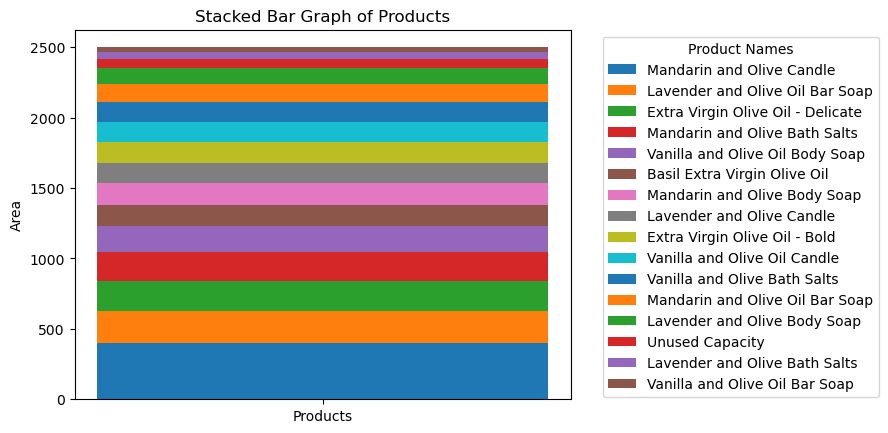

In [20]:
# Plotting
fig, ax = plt.subplots()
bottom = 0  # Start at 0 for the first item

# Loop over each product name and its corresponding length
for name, length in zip(product_names, lengths):
    ax.bar("Products", length, bottom=bottom, label=name)
    bottom += length  # Increment the bottom for the next stack

# Add labels and title
ax.set_ylabel('Area')
ax.set_title('Stacked Bar Graph of Products')
ax.legend(title='Product Names', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

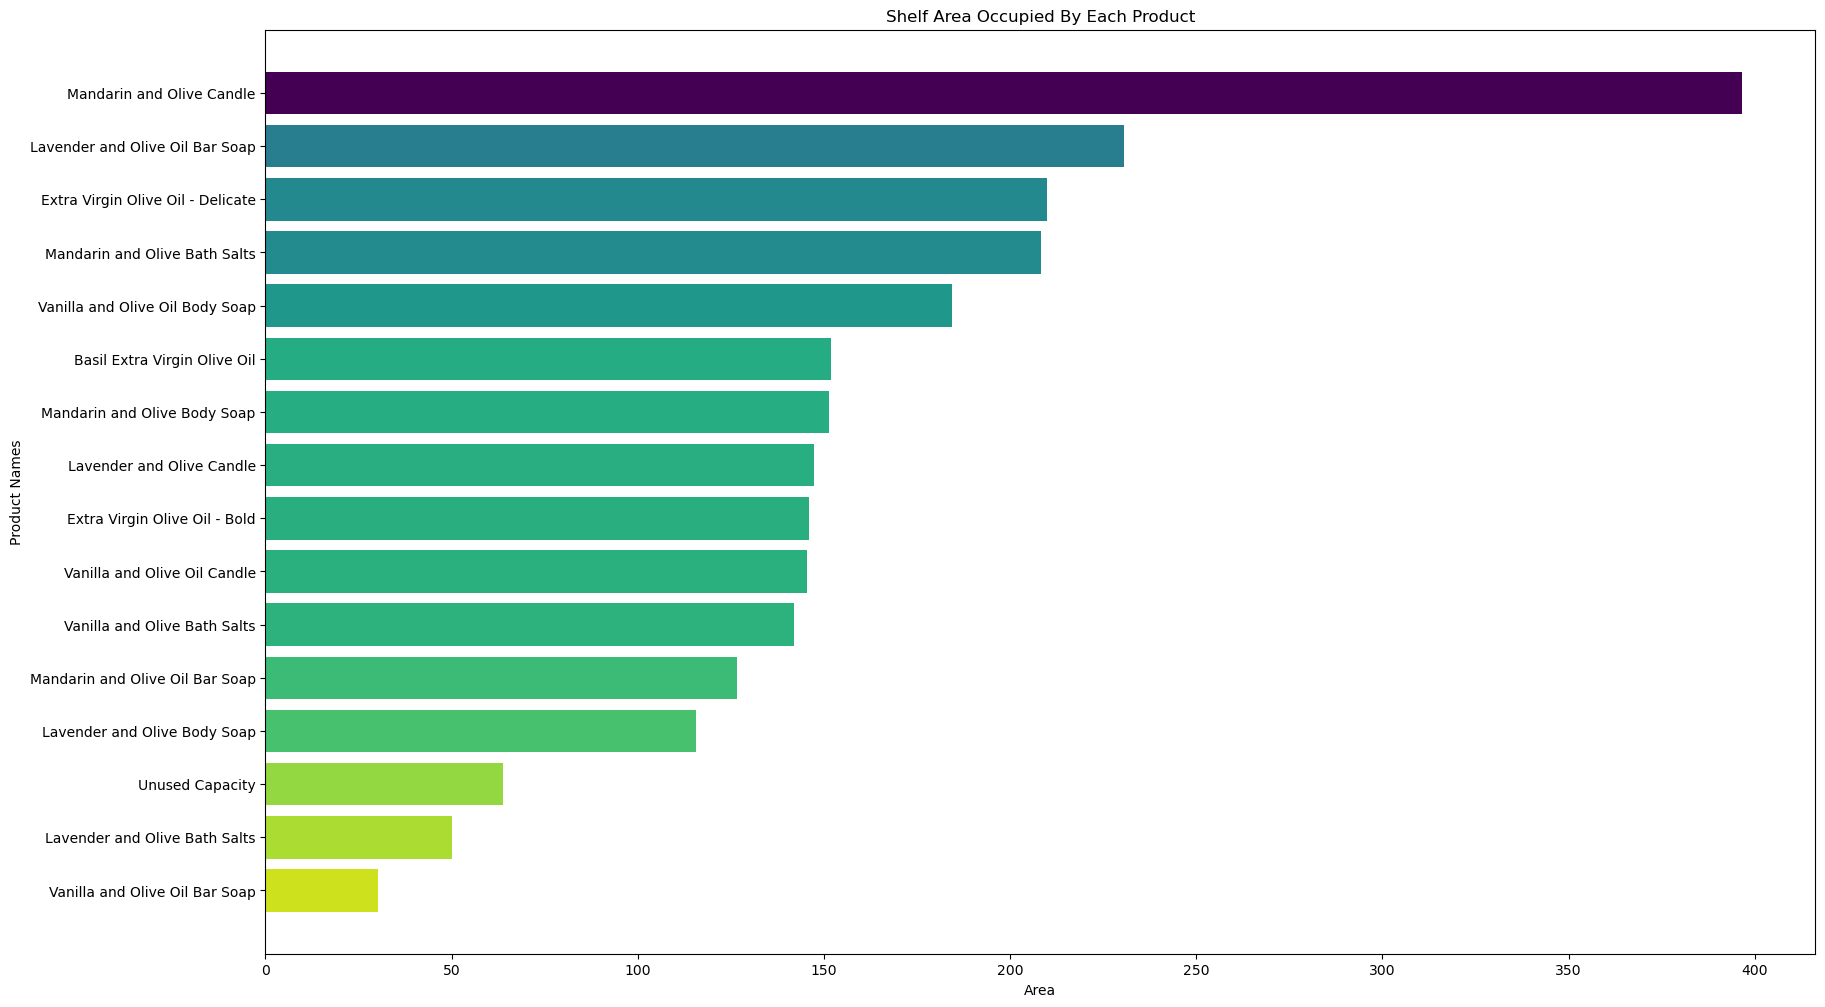

In [21]:
plt.figure(figsize=(20, 12))
colors = plt.cm.viridis_r(lengths / max(lengths))
plt.barh(product_names, lengths, color=colors)
plt.xlabel('Area')
plt.ylabel('Product Names')
plt.title('Shelf Area Occupied By Each Product')
plt.gca().invert_yaxis()  # Invert y-axis to have the longest name at the top
plt.show()